**Thomas, Daphné, Morgan, Coralie**

Dream Housing Finance société de crédit spécialisée dans les prêts immobiliers. Ils sont présents dans toutes les zones urbaines, semi-urbaines et rurales. Pour chaque client demandeur de prêt au logement l'entreprise doit vérifier l'éligibilité de ce dernier.

L'entreprise souhaite automatiser le processus d'admissibilité au prêt en fonction des renseignements fournis par le client au moment de remplir le formulaire de demande en ligne. 

Ces détails sont le sexe, l'état civil, les études, le nombre de personnes à charge, le revenu, le montant du prêt, les antécédents de crédit et autres. Pour automatiser ce processus, ils ont donné un problème pour identifier les segments de clients, ceux qui sont éligibles pour le prêt afin qu'ils puissent cibler spécifiquement ces clients. Ils ont fourni ici un ensemble partiel de données.

La variable à prédire est donc *Loan_Status*.


Ci-après le détail des données:

**The Data**  

*Variable* 	: *Description* 

Loan_ID: 	Unique Loan ID     
Gender: 	Male/ Female  
Married: 	Applicant married (Y/N)  
Dependents: 	Number of dependents  
Education: 	Applicant Education (Graduate/ Under Graduate)  
Self_Employed: 	Self employed (Y/N)  
ApplicantIncome: 	Applicant income  
CoapplicantIncome: 	Coapplicant income    
LoanAmount 	Loan: amount in thousands  
Loan_Amount_Term: 	Term of loan in months  
Credit_History: 	credit history meets guidelines  
Property_Area: 	Urban/ Semi Urban/ Rural  
Loan_Status: 	Loan approved (Y/N)  

**Challenge:**


Réalisez une analyse graphique pour explorer les données.  
Faites un premier modèle pour prédire la variable cible, vous évalurez la performance de ce modèle à l'aide d'une validation croisée à 5 couches.


In [0]:
import pandas as pd
import numpy as np


In [0]:
url = "https://raw.githubusercontent.com/shri1407/Loan-Prediction-Dataset/master/train.csv"
df_source = pd.read_csv(url)
df_source.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
df_source.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
df_source.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001888,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [0]:
df_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [0]:
print(df_source[df_source["Gender"].isna()])

      Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
23   LP001050    NaN     Yes  ...            0.0         Rural           N
126  LP001448    NaN     Yes  ...            1.0         Rural           Y
171  LP001585    NaN     Yes  ...            1.0         Urban           Y
188  LP001644    NaN     Yes  ...            1.0         Rural           Y
314  LP002024    NaN     Yes  ...            1.0         Rural           N
334  LP002103    NaN     Yes  ...            1.0         Urban           Y
460  LP002478    NaN     Yes  ...            NaN     Semiurban           Y
467  LP002501    NaN     Yes  ...            1.0     Semiurban           Y
477  LP002530    NaN     Yes  ...            0.0     Semiurban           N
507  LP002625    NaN      No  ...            1.0         Urban           N
576  LP002872    NaN     Yes  ...            0.0     Semiurban           N
588  LP002925    NaN      No  ...            1.0     Semiurban           Y
592  LP002933    NaN     

In [0]:
df_source.index[df_source.isnull().any(axis=1)]

Int64Index([  0,  11,  16,  19,  23,  24,  29,  30,  35,  36,
            ...
            571, 576, 579, 583, 588, 592, 597, 600, 601, 605],
           dtype='int64', length=134)

In [0]:
print(df_source[df_source["Married"].isna()])

      Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
104  LP001357    Male     NaN  ...            1.0         Urban           Y
228  LP001760    Male     NaN  ...            1.0     Semiurban           Y
435  LP002393  Female     NaN  ...            1.0     Semiurban           Y

[3 rows x 13 columns]


In [0]:
print(df_source[df_source["Dependents"].isna()])

      Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
102  LP001350    Male     Yes  ...            1.0         Urban           Y
104  LP001357    Male     NaN  ...            1.0         Urban           Y
120  LP001426    Male     Yes  ...            1.0         Rural           Y
226  LP001754    Male     Yes  ...            1.0         Urban           N
228  LP001760    Male     NaN  ...            1.0     Semiurban           Y
293  LP001945  Female      No  ...            0.0         Urban           N
301  LP001972    Male     Yes  ...            1.0     Semiurban           Y
332  LP002100    Male      No  ...            1.0         Urban           Y
335  LP002106    Male     Yes  ...            1.0     Semiurban           Y
346  LP002130    Male     Yes  ...            0.0         Rural           N
355  LP002144  Female      No  ...            1.0         Urban           Y
435  LP002393  Female     NaN  ...            1.0     Semiurban           Y
517  LP00268

In [0]:
df_source = df_source.dropna(axis = 0)

In [0]:
df_source.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [0]:
df_source['Gender'] = pd.get_dummies(df_source['Gender'], drop_first=True)

In [0]:
df_source['Married'] = pd.get_dummies(df_source['Married'], drop_first=True)
df_source['Education'] = pd.get_dummies(df_source['Education'], drop_first=True)
df_source['Self_Employed'] = pd.get_dummies(df_source['Self_Employed'], drop_first=True)


In [0]:
df_source.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [0]:
test = pd.get_dummies(df_source['Property_Area'], drop_first=True)
test

,Semiurban,Urban
1,0,0
2,0,1
3,0,1
4,0,1
5,0,1
...,...,...
609,0,0
610,0,0
611,0,1
612,0,1


In [0]:
df_source = pd.concat([df_source,test],axis=1)


In [0]:
df_source.drop(['Property_Area'], axis=1, inplace=True)

In [0]:
df_source['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [0]:
df_source = df_source.replace("3+", "3")
df_source["Dependents"]=df_source["Dependents"].astype('int64')
df_source.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    uint8  
 2   Married            480 non-null    uint8  
 3   Dependents         480 non-null    int64  
 4   Education          480 non-null    uint8  
 5   Self_Employed      480 non-null    uint8  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Loan_Status        480 non-null    object 
 12  Semiurban          480 non-null    uint8  
 13  Urban              480 non-null    uint8  
dtypes: float64(4), int64(2), object(2), uint8(6)
memory usage: 36.6+ KB


In [0]:
df_source.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,N,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Y,0,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Y,0,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Y,0,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,Y,0,1


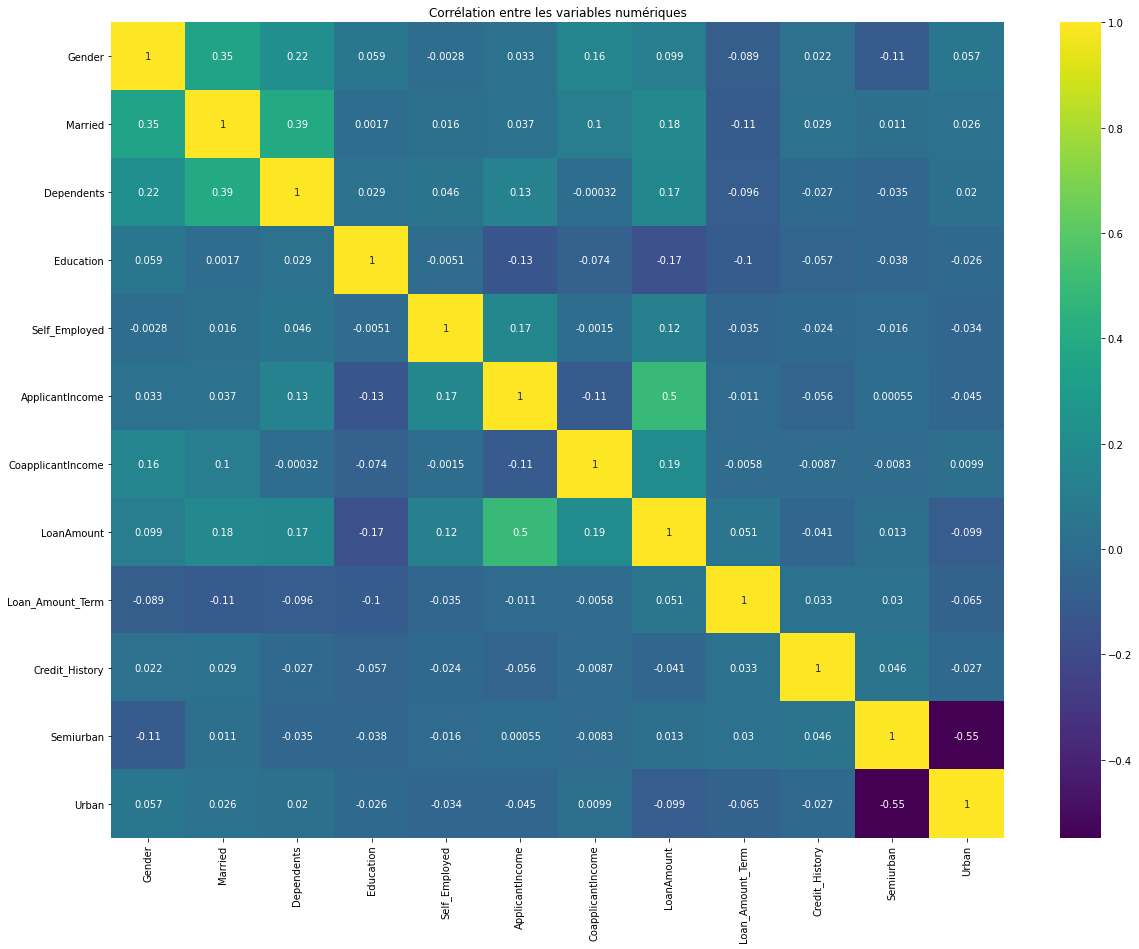

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,15))
sns.heatmap(df_source.corr(), cmap='viridis', annot=True)

plt.title("Corrélation entre les variables numériques")
plt.show()

# Train test split

In [0]:
X = df_source.drop(["Loan_Status", "Loan_ID"], axis = 1)
y = df_source["Loan_Status"]

In [0]:
# Your code here :
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 2)

In [0]:
# Import
from sklearn.preprocessing import StandardScaler

# Create and fit a scaler model
scaler = StandardScaler().fit(X_train)

# Your scaler model can now transform your data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [0]:
clf = DecisionTreeClassifier(random_state=0)
model = clf.fit(X_train_scaled,y_train)
prediction_test = model.predict(X_test_scaled)
prediction_train = model.predict(X_train_scaled)

In [0]:
accuracy_train = accuracy_score(y_train, prediction_train)*100
print(accuracy_train)


accuracy_test = accuracy_score(y_test, prediction_test)*100
print(accuracy_test)

100.0
75.83333333333333


In [0]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, r2_score
tree = cross_validate(clf, X, y, cv=5, scoring=make_scorer(r2_score))

ValueError: ignored

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_scaled, y, scoring='accuracy',cv=6)
scores